<a href="https://colab.research.google.com/github/rita-milani/data_science_na_pratica/blob/master/Violence_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Violence in Rio de Janeiro

In this project, we are going to work with a database containing series about violence in the state and city of Rio de Janeiro. The data was obtained from [ISP Dados](http://www.ispdados.rj.gov.br), organized by the Institute of Public Security from Rio de Janeiro. The database contains series about theft, homicide, kidnap and others from 1991 to 2020, and due to the size, we are going to select specific variables to work with.

As part of DSNP course, the aim of this project is to learn how to **manipulate data** in `Pandas` library, executing basic commands that are easily used in Excel, but require further coding skills in `Python`, like:

- Replace **blank cells** for **NaN**
- Convert **data type**
- **Aggregate columns**
- **Drop columns**
- Work with **selected sets of rows and columns**
- Build **pivot tables** to aggregate monthly to yearly data
- Work with **percentual change** 
- **Plot data**




### **The Question**

<center>

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Rio_De_Janeiro_-_Rafael_Defavari.jpg/700px-Rio_De_Janeiro_-_Rafael_Defavari.jpg)

</center>

The city of Rio de Janeiro is a famous touristical attraction, known by Christ the Redeemer, the Sugarloaf and beaches like Copacabana and Ipanema. According to Euromonitor International, the city attracted **2,3 million foreign tourists in 2019**. 

The Metropolitan Region reaches **11,8 million inhabitants**, which makes it the **second biggest urban concentration in Brazil**. The city of Rio de Janeiro is the capital of the state with the same name, whith the population of 16,7 million inhabitants. 

Unfortunately, headlines about the city are not solely due to the beautiful landscape. During the last decades, the increase of violence has called attention of the media nationally and worldwide. Stray bullets, theft, kidnapps and drug traffic are among the most frequent crimes in the city. 

The social and economic inequalities are the roots of the problem. With a share of poor and marginalized population which occupied mountain areas known as 'favelas', these people have no access to basic services as sanitation and electricity, and some are controlled by drug dealer groups. 

In this exercise, we want to analyze the **trajectory of main indicators** and check if the violence in Rio de Janeiro increased during the last years. 


### Importing Python libraries and reading the data file:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
path = "https://raw.githubusercontent.com/rita-milani/data_science_na_pratica/master/violencia_rio.csv"
df = pd.read_csv(path, sep=';')

First, we will take a look at the dataset to check visually for structure and missing values:

### Missing Values: no null values despite of blank cells?

In [4]:
df.head(12)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3
5,1991,6,647,,14,,661,201,2977,,,,518,178,1354,82,831,342,37,,,,,,81,3423,1992,673,,,,3519,6184,,,,,157,,,,802,,,,,,,111,,,,,1173,1354,82,,3
6,1991,7,558,,14,,572,201,2784,,,,496,186,1365,82,797,308,25,,,,,,94,3353,1978,700,,,,3604,6282,,,,,203,,,,870,,,,,,,126,,,,,1105,1365,82,,3
7,1991,8,557,,11,,568,209,3134,,,,498,189,1347,71,813,299,29,,,,,,88,3334,1835,794,,,,3641,6270,,,,,215,,,,809,,,,,,,79,,,,,1112,1347,71,,3
8,1991,9,542,,19,,561,146,3026,,,,473,199,1353,91,805,281,12,,,,,,90,3304,1993,810,,,,3460,6263,,,,,179,,,,756,,,,,,,71,,,,,1086,1353,91,,3
9,1991,10,613,,21,,634,200,3482,,,,561,228,1470,83,834,328,16,,,,,,107,3627,1999,862,,,,3621,6482,,,,,184,,,,818,,,,,,,95,,,,,1162,1470,83,,3


As we can see, there are some blank values along the dataframe. So we use the `df.isnull` method to count them.

In [5]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

fase                          0.0
roubo_veiculo                 0.0
furto_veiculos                0.0
total_roubos                  0.0
outros_roubos                 0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_celular                 0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_carga                   0.0
roubo_residencia              0.0
registro_ocorrencias          0.0
roubo_comercio                0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
letalidade_violenta           0.0
hom_por_interv_policial       0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
mes                           0.0
furto_transeunte              0.0
furto_coletivo

**Surprisingly**, the method recognizes **no missing values** in the dataset. This happens because there are no **NaN** replacing the blank cells. So, next step is to **replace** them using `df.replace`:

In [0]:
df.replace(" ", np.nan, inplace=True)

So we repeat the previous steps for checking the amount of missing values in our dataset, and we can see that some series, like `bike_theft`, have almost 80% of missing values. This happens because the series began to be compiled after 1991. 

In [7]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


In [8]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.790831
furto_bicicleta               0.790831
cmba                          0.515759
cmp                           0.515759
posse_drogas                  0.515759
trafico_drogas                0.515759
apreensao_drogas_sem_autor    0.515759
apf                           0.515759
aaapai                        0.515759
sequestro_relampago           0.412607
estelionato                   0.412607
roubo_conducao_saque          0.412607
furto_coletivo                0.412607
roubo_apos_saque              0.412607
pol_militares_mortos_serv     0.412607
pol_civis_mortos_serv         0.412607
furto_celular                 0.412607
roubo_cx_eletronico           0.412607
estupro                       0.412607
extorsao                      0.412607
pessoas_desaparecidas         0.378223
encontro_ossada               0.378223
roubo_celular                 0.309456
registro_ocorrencias          0.275072
lesao_corp_culposa            0.275072
sequestro                

### Data types: are all the columns considered values?

We have several data types, and as we are working with numerical variables, we need `int64` and `float` types. As we will see below, many of the series are classified as `object`, so we need to convert them to integer type.

In [9]:
df.dtypes

vano                           int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

### Data type conversion
To change the data type, we will use `pd.factorize` method.

In [10]:
df.hom_culposo = pd.factorize(df.hom_culposo)[0]
print(df.hom_culposo.dtypes)

df.hom_por_interv_policial = pd.factorize(df.hom_por_interv_policial)[0]
print(df.hom_por_interv_policial.dtypes)

df.sequestro = pd.factorize(df.sequestro)[0]
print(df.sequestro.dtypes)

df.sequestro_relampago = pd.factorize(df.sequestro_relampago)[0]
print(df.sequestro_relampago.dtypes)

df.posse_drogas = pd.factorize(df.posse_drogas)[0]
print(df.posse_drogas.dtypes)

df.trafico_drogas = pd.factorize(df.trafico_drogas)[0]
print(df.trafico_drogas.dtypes)


int64
int64
int64
int64
int64
int64


In [11]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,-1,672,162,3051,NaN,-1,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,-1,NaN,-1,NaN,133,-1,-1,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,-1,749,175,3421,NaN,-1,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,-1,NaN,-1,NaN,127,-1,-1,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,-1,738,216,3613,NaN,-1,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,-1,NaN,-1,NaN,80,-1,-1,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,-1,654,200,3211,NaN,-1,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,-1,NaN,-1,NaN,133,-1,-1,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,-1,670,146,3051,NaN,-1,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,-1,NaN,-1,NaN,163,-1,-1,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


As we can see, after converting a column from `object` to `int64`, **some of the NaN cells appear eventually as `0` or `-1`**, which could alter the results. 
We solve this by replacing the `0` for `NaN`.

In [0]:
df.replace(0, np.nan, inplace=True)

In [0]:
df.replace(-1, np.nan, inplace=True)

In [14]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37.0,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35.0,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209.0,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43.0,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36.0,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27.0,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


### Aggregating columns: summing the variables
Now that we transformed our variables into numerical, we wil aggregate the desired ones into bigger categories, like **homicide, kidnap and drugs**.

In [0]:
df['hom'] = df[['hom_doloso','hom_culposo','hom_por_interv_policial']].sum(axis=1)
df['kidn'] = df[['sequestro', 'sequestro_relampago']].sum(axis=1)
df['drugs'] = df[['apreensao_drogas', 'apreensao_drogas_sem_autor', 'posse_drogas', 'trafico_drogas']].sum(axis=1)

Once again we call the last rows to verify if the new series were added:

In [16]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase,hom,kidn,drugs
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37.0,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3,657.0,0.0,133.0
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35.0,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209.0,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3,732.0,0.0,127.0
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43.0,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188.0,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3,713.0,0.0,80.0
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36.0,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3,634.0,0.0,133.0
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27.0,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3,650.0,0.0,163.0


### Drop columns: we don´t need all of those series 
As our database contains more than 50 variables and we aggregated the ones we need, we will **drop** the ones that no longer interest us.

**Important:** for the columns to be dropped immediately from the dataframe, it is necessary to use the parameter `inplace=True`, or the dropped columns will appear whenever `df.head()` is called. 

In [17]:
# calling all the variables names
sorted(df)

['aaapai',
 'ameaca',
 'apf',
 'apreensao_drogas',
 'apreensao_drogas_sem_autor',
 'cmba',
 'cmp',
 'drugs',
 'encontro_cadaver',
 'encontro_ossada',
 'estelionato',
 'estupro',
 'extorsao',
 'fase',
 'furto_bicicleta',
 'furto_celular',
 'furto_coletivo',
 'furto_transeunte',
 'furto_veiculos',
 'hom',
 'hom_culposo',
 'hom_doloso',
 'hom_por_interv_policial',
 'indicador_cvli',
 'indicador_roubo_carga',
 'indicador_roubo_rua',
 'indicador_roubo_veic',
 'kidn',
 'latrocinio',
 'lesao_corp_culposa',
 'lesao_corp_dolosa',
 'lesao_corp_morte',
 'letalidade_violenta',
 'mes',
 'outros_furtos',
 'outros_roubos',
 'pessoas_desaparecidas',
 'pol_civis_mortos_serv',
 'pol_militares_mortos_serv',
 'posse_drogas',
 'recuperacao_veiculos',
 'registro_ocorrencias',
 'roubo_apos_saque',
 'roubo_banco',
 'roubo_bicicleta',
 'roubo_carga',
 'roubo_celular',
 'roubo_comercio',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'roubo_em_coletivo',
 'roubo_residencia',
 'roubo_transeunte',
 'roubo_veic

In [0]:
# drop the variables 
df.drop(['aaapai',
 'ameaca',
 'apf',
 'apreensao_drogas',
 'apreensao_drogas_sem_autor',
 'cmba',
 'cmp',
 'encontro_cadaver',
 'encontro_ossada',
 'estelionato',
 'estupro',
 'extorsao',
 'fase',
 'furto_bicicleta',
 'furto_celular',
 'furto_coletivo',
 'furto_transeunte',
 'furto_veiculos',
 'hom_culposo',
 'hom_doloso',
 'hom_por_interv_policial',
 'indicador_cvli',
 'indicador_roubo_carga',
 'indicador_roubo_rua',
 'indicador_roubo_veic',
 'latrocinio',
 'lesao_corp_culposa',
 'lesao_corp_dolosa',
 'lesao_corp_morte',
 'letalidade_violenta',
 'outros_furtos',
 'outros_roubos',
 'pessoas_desaparecidas',
 'pol_civis_mortos_serv',
 'pol_militares_mortos_serv',
 'posse_drogas',
 'recuperacao_veiculos',
 'registro_ocorrencias',
 'roubo_apos_saque',
 'roubo_banco',
 'roubo_bicicleta',
 'roubo_carga',
 'roubo_celular',
 'roubo_comercio',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'roubo_em_coletivo',
 'roubo_residencia',
 'roubo_transeunte',
 'roubo_veiculo',
 'sequestro',
 'sequestro_relampago',
 'tentat_hom', 'trafico_drogas'], axis=1, inplace=True)

In [19]:
df.head()

,vano,mes,total_roubos,total_furtos,hom,kidn,drugs
0,1991,1,3318,6717,657.0,0.0,133.0
1,1991,2,3261,6225,732.0,0.0,127.0
2,1991,3,3529,6719,713.0,0.0,80.0
3,1991,4,3808,6570,634.0,0.0,133.0
4,1991,5,3755,6454,650.0,0.0,163.0


We have now the 5 variables we will work with. They are:

- `total_roubos` - total theft (car, house, bike, phone, etc) in the state of Rio de Janeiro, monhtly figures
- `total_furtos` - total sneak - no direct interaction with the victim - in the state of Rio de Janeiro, monthly figures
- `drugs` - possession and apprehension - with and without the responsible person - in the state of Rio de Janeiro, monthly figures
- `hom` - total homicides in the state of Rio de Janeiro, monthly figures
- `kidn` - total kidnap in the state of Rio de Janeiro, monthly figures

###Working with selected data
We have **monthly data** available in our dataset, but to have a clearer view of the indicators, we want to aggregate them on a **yearly** basis. To do this, we apply the **pivot table**, using the `pd.pivot_table` method:

We will also use `iloc` to select the parts of columns and rows to be plotted.

        drugs     hom   kidn  total_furtos  total_roubos
vano                                                    
1991   1866.0  7518.0    0.0         77211         42784
1992   2043.0  7635.0    0.0         82646         52172
1993   1749.0  7720.0    0.0         76668         48949
1994   1830.0  8408.0    0.0         69491         53958
1995   3508.0  8438.0    0.0         59986         49271
1996   6731.0  7259.0    0.0         61078         46507
1997   6388.0  6923.0    0.0         71797         55491
1998  13377.0  5843.0    0.0         76387         62368
1999   8904.0  6209.0    0.0         80007         76523
2000  10259.0  6823.0    5.0         88358         83242
2001  12592.0  6927.0    9.0         97868         97973
2002  12637.0  7860.0   22.0        107258        114720
2003  13350.0  7809.0   32.0        119533        118834
2004  12007.0  7597.0   56.0        118770        110903
2005  11761.0  7994.0   82.0        126333        113437
2006  11219.0  7767.0   83.0   

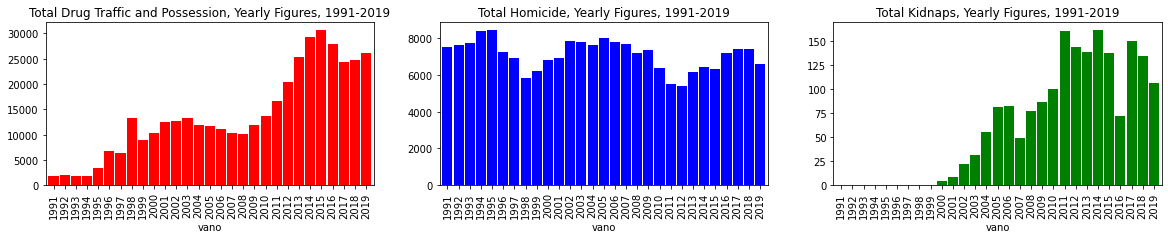

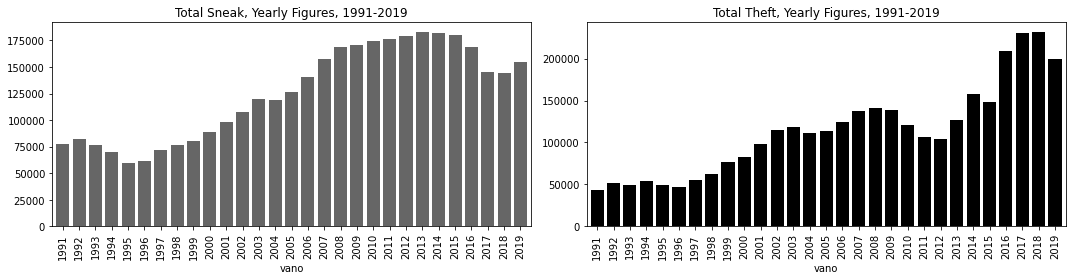

In [35]:
# use pivot table to aggregate monthly data
pv = pd.pivot_table(df, values=['total_roubos', 'total_furtos', 'hom', 'kidn', 'drugs'], index='vano', aggfunc='sum')
print(pv)

# plot yearly graphs
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,3))

# use iloc to select the columns and rows to be plotted
pv.iloc[:-1, 0].plot(kind='bar', color='r', width=0.9, ax=ax1)
ax1.set_title("Total Drug Traffic and Possession, Yearly Figures, 1991-2019")

pv.iloc[:-1, 1].plot(kind='bar', color='b', width=0.9, ax=ax2)
ax2.set_title("Total Homicide, Yearly Figures, 1991-2019")

pv.iloc[:-1, 2].plot(kind='bar', color='g', width=0.9, ax=ax3)
ax3.set_title("Total Kidnaps, Yearly Figures, 1991-2019")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

pv.iloc[:-1, 3].plot(kind='bar', color='0.4', width=0.8, ax=ax1)
ax1.set_title("Total Sneak, Yearly Figures, 1991-2019")

pv.iloc[:-1, 4].plot(kind='bar', color='k', width=0.8, ax=ax2)
ax2.set_title("Total Theft, Yearly Figures, 1991-2019")


plt.tight_layout()

From the graphs above, we can see that there was a **sharp increase in all violence indicators from around 1995 on**, except for homicide, that seemingly fluctuates around an average. 
 
For the recent years, it is possible to observe that, from 2015, **drug traffic and sneak** have presented a downward trend. 

For **2019**, the **drug possession and apprehension increased, while homicides, kidnaps and theft decreased**. Despite of the improvement of figures, rates are still high. Take **homicides** as an example: 6,577 cases in 2019 mean almost **550 a month**, **an average of 18 homicides a day**. For **theft**, the figures were **almost 200 thousand** a year, which results in **more than 1 thousand cases a day**.

<center>

![alt text](https://s2.glbimg.com/eA7tTQwAjvr_poG-oPGLjv3MN0A=/0x0:1920x1080/1344x0/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2016/01/05/roubo_20160105122011.jpg)
</center>

Now that we have the yearly values, we want to check the **yearly variation** for the aggregated variables to find out if they increased or decreased. For this, we use the `pv_transform` method on the pivot table, and apply the `pct_change` operation. 

In [21]:
pv_change = (pv.transform(pd.Series.pct_change)*100)
print(pv_change)

           drugs        hom        kidn  total_furtos  total_roubos
vano                                                               
1991         NaN        NaN         NaN           NaN           NaN
1992    9.485531   1.556265         NaN      7.039152     21.942782
1993  -14.390602   1.113294         NaN     -7.233260     -6.177643
1994    4.631218   8.911917         NaN     -9.361142     10.233100
1995   91.693989   0.356803         NaN    -13.678030     -8.686386
1996   91.875713 -13.972505         NaN      1.820425     -5.609791
1997   -5.095825  -4.628737         NaN     17.549691     19.317522
1998  109.408265 -15.600173         NaN      6.393025     12.393001
1999  -33.437991   6.263906         NaN      4.739026     22.695934
2000   15.217880   9.888871         inf     10.437837      8.780367
2001   22.741008   1.524256   80.000000     10.763032     17.696595
2002    0.357370  13.469034  144.444444      9.594556     17.093485
2003    5.642162  -0.648855   45.454545     11.4

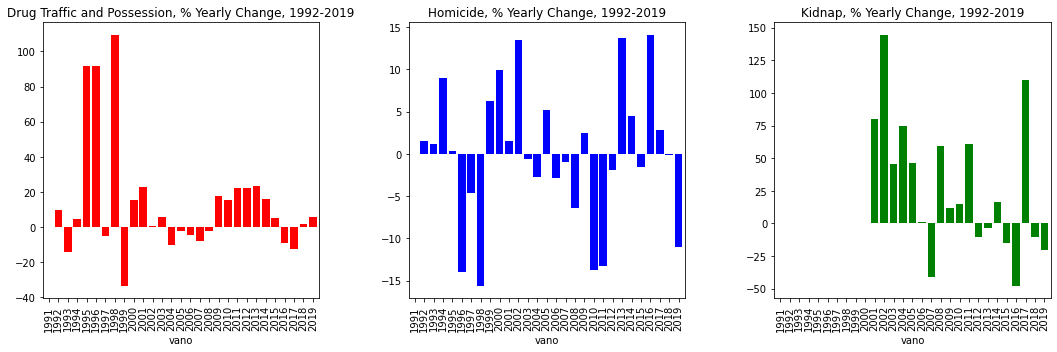

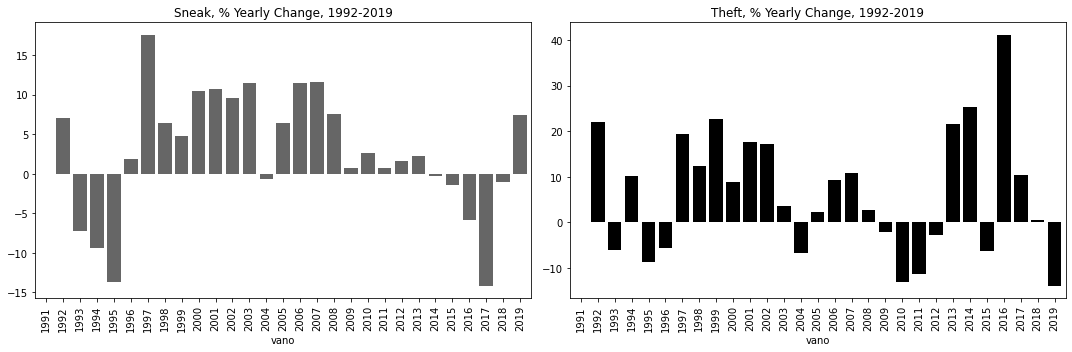

In [36]:
# plot yearly variation graphs
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

pv_change.iloc[:-1, 0].plot(kind='bar', color='r', width=0.8, ax=ax1)
ax1.set_title("Drug Traffic and Possession, % Yearly Change, 1992-2019")

pv_change.iloc[:-1, 1].plot(kind='bar', color='b', width=0.8, ax=ax2)
ax2.set_title("Homicide, % Yearly Change, 1992-2019")

pv_change.iloc[:-1, 2].plot(kind='bar', color='g', width=0.8, ax=ax3)
ax3.set_title("Kidnap, % Yearly Change, 1992-2019")

plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

pv_change.iloc[:-1, 3].plot(kind='bar', color='0.4', width=0.8, ax=ax1)
ax1.set_title("Sneak, % Yearly Change, 1992-2019")

pv_change.iloc[:-1,4].plot(kind='bar', color='k', width=0.8, ax=ax2)
ax2.set_title("Theft, % Yearly Change, 1992-2019")

plt.tight_layout()

The yearly variation graphs shows no clear or sutained trend of increase or decrease in the crimes. Taking homicide and kidnapp as examples, years with increase in crimes are followed by years of decrease. 

###**Conclusion**

We worked with an extensive database about violence in Rio de Janeiro. With a raw .csv file, it was possible to perform tasks like **find and replace null values, convert variable types, aggregate columns and select data to plot graphs**.

As a result from the analysis, we may conclude that, with the exception of homicide, there was **a steep increase in crimes in Rio de Janeiro, mainly since the mid-90s**. During the **recent years**, the **trends are mixed**, and it must be taken into account that, according to ISP, **between January and March 2017, there was a strike from Police, which affected the reports of crimes**. 

But it is possible to affirm that, in **2019**, the amount of **homicides, kidnaps and theft reduced, while the rate of apprehension of drugs increased**. This may be a result of politics that fostered more **ostensive police work** in the city during the last year. However, there is still a lot to be done, as the current rates still remain elevated. 